In [5]:
# Import required libraries and dependencies
import pandas as pd
import hvplot.pandas
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [6]:
# Import necessary libraries
import pandas as pd

# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display the first few rows of the DataFrame to verify the data
df_market_data.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


In [15]:
# Get summary statistics
summary_statistics = df_market_data.describe()
print(summary_statistics)

# Plot the data
import matplotlib.pyplot as plt



       price_change_percentage_24h  price_change_percentage_7d  \
count                    41.000000                   41.000000   
mean                     -0.269686                    4.497147   
std                       2.694793                    6.375218   
min                     -13.527860                   -6.094560   
25%                      -0.608970                    0.047260   
50%                      -0.063410                    3.296410   
75%                       0.612090                    7.602780   
max                       4.840330                   20.694590   

       price_change_percentage_14d  price_change_percentage_30d  \
count                    41.000000                    41.000000   
mean                      0.185787                     1.545693   
std                       8.376939                    26.344218   
min                     -18.158900                   -34.705480   
25%                      -5.026620                   -10.438470   
50%

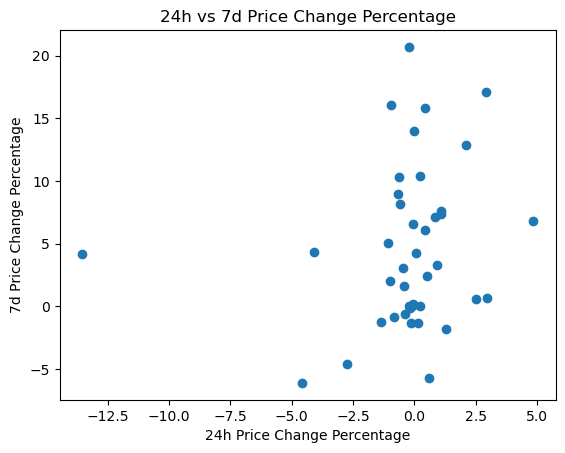

In [16]:
# Plot the price_change_percentage_24h vs price_change_percentage_7d
plt.scatter(df_market_data['price_change_percentage_24h'], df_market_data['price_change_percentage_7d'])
plt.title('24h vs 7d Price Change Percentage')
plt.xlabel('24h Price Change Percentage')
plt.ylabel('7d Price Change Percentage')
plt.show()


---

### Prepare the Data

In [17]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_market_data)


In [25]:
# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled_data, columns=df_market_data.columns)

# Copy the crypto names from the original data
df_scaled.index = df_market_data.index

# Set the coinid column as index

# Display sample data
print(df_scaled.head())

              price_change_percentage_24h  price_change_percentage_7d  \
coin_id                                                                 
bitcoin                          0.508529                    0.493193   
ethereum                         0.185446                    0.934445   
tether                           0.021774                   -0.706337   
ripple                          -0.040764                   -0.810928   
bitcoin-cash                     1.193036                    2.000959   

              price_change_percentage_14d  price_change_percentage_30d  \
coin_id                                                                  
bitcoin                          0.772200                     0.235460   
ethereum                         0.558692                    -0.054341   
tether                          -0.021680                    -0.061030   
ripple                           0.249458                    -0.050388   
bitcoin-cash                     1.760610   

---

### Find the Best Value for k Using the Original Data.

In [7]:
# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [8]:
# Create an empty list to store the inertia values
inertia_values = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_scaled`
# 3. Append the model.inertia_ to the inertia list

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(scaled_data)
    inertia_values.append(kmeans.inertia_)

In [9]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'k': k_values,
    'inertia': inertia_values
}


# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

#Displaying the DataFrame
print(elbow_df.head())

In [10]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

import matplotlib.pyplot as plt

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o', linestyle='--')
plt.title('Elbow Curve for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(elbow_df['k'])  # Set x-ticks to match the k-values
plt.grid(True)
plt.show()


#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer:** Based on the elbow curve, the best value for k is 4. This is the point where the inertia starts to decrease at a slower rate, indicating the optimal number of clusters for the data

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [11]:
from sklearn.cluster import KMeans
import hvplot.pandas  # For hvPlot

# Initialize the KMeans model using the best value for k
best_k = 4  # Replace with the best k value from your elbow method analysis
kmeans = KMeans(n_clusters=best_k, random_state=0)

In [12]:
# Fit the K-Means model using the scaled data
kmeans.fit(df_market_data_scaled)


In [13]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = kmeans.predict(df_market_data_scaled)


# Print the resulting array of cluster values.
print(clusters)


In [14]:
# Create a copy of the DataFrame
df_clustered = df_market_data.copy()


In [15]:
# Add a new column to the DataFrame with the predicted clusters
scatter_plot = df_clustered.hvplot.scatter(
    x='price_change_percentage_24h',
    y='price_change_percentage_7d',
    c='Cluster',  # Color by cluster label
    cmap='tab10',  # Color map
    hover_cols=['coin_id'],  # Show cryptocurrency names on hover
    width=800,
    height=400,
    title='Cryptocurrency Clusters'
)


# Display sample data
scatter_plot

In [16]:
# Create a scatter plot using hvPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.



import hvplot.pandas  # Ensure hvplot is imported

# Create a scatter plot using hvPlot
scatter_plot = df_clustered.hvplot.scatter(
    x='price_change_percentage_24h',  # X-axis: 24h price change percentage
    y='price_change_percentage_7d',   # Y-axis: 7d price change percentage
    c='Cluster',                      # Color by the cluster labels
    cmap='tab10',                     # Color map for clusters
    hover_cols=['coin_id'],           # Show cryptocurrency names on hover
    width=800,                        # Width of the plot
    height=400,                       # Height of the plot
    title='Cryptocurrency Clusters'   # Title of the plot
)

# Display the scatter plot
scatter_plot

---

### Optimize Clusters with Principal Component Analysis.

In [17]:
from sklearn.decomposition import PCA

# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)


In [18]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.

# View the first five rows of the DataFrame. 

# Fit and transform the scaled data to reduce it to three principal components
pca_data = pca.fit_transform(df_market_data_scaled)

# Create a DataFrame with the PCA data
df_pca = pd.DataFrame(
    pca_data,
    index=df_market_data_scaled.index,  # Set the original indices
    columns=['PC1', 'PC2', 'PC3']      # Principal component columns
)

# View the first five rows of the PCA DataFrame
print(df_pca.head())

In [19]:
# Retrieve the explained variance to determine how much information 
explained_variance = pca.explained_variance_ratio_

# can be attributed to each principal component.
print(f"Explained variance ratio for each component: {explained_variance}")
print(f"Total explained variance: {explained_variance.sum()}")

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** the total explained variance of the three principal components is approximately 98.87%

In [20]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming df_market_data is already loaded and scaled
# Perform PCA
pca = PCA(n_components=3)
pca_data = pca.fit_transform(df_market_data_scaled)


# Create a DataFrame with PCA data
pca_df = pd.DataFrame(
    pca_data,
    index=df_market_data.index,
    columns=['PC1', 'PC2', 'PC3']
)

# Display the first five rows of the PCA DataFrame
pca_df.head()






# Create a new DataFrame with the PCA data.
# Creating a DataFrame with the PCA data
# Copy the crypto names from the original data
# Set the coinid column as index
# Display sample data

---

### Find the Best Value for k Using the PCA Data

In [21]:
# Create a list with the number of k-values from 1 to 11
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming pca_df is the DataFrame with PCA data

# Create a list with the number of k-values from 1 to 11
k_values = list(range(1, 12))

In [22]:
# Create an empty list to store the inertia values
inertia = []


# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list



# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Create a KMeans model using the loop counter for n_clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    
    # Fit the model to the data using pca_df
    kmeans.fit(pca_df)
    
    # Append the model.inertia_ to the inertia list
    inertia.append(kmeans.inertia_)

In [23]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {
    'Number of Clusters': k_values,
    'Inertia': inertia
}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

In [24]:
# Plot a line chart with all the inertia values computed with 

# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['Number of Clusters'], elbow_df['Inertia'], marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for k using the PCA data is 4, as identified by the "elbow" point in the inertia plot where the decrease in inertia starts to slow down significantly.



* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No, it does not differ. The best value for k found using the original data was also 4. This consistency suggests that reducing the dimensions using PCA did not significantly change the clustering results.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [25]:
# Initialize the K-Means model using the best value for k
kmeans_pca = KMeans(n_clusters=best_k_pca)


In [26]:
# Fit the K-Means model using the PCA data
kmeans_pca.fit(df_market_data_pca)


In [27]:
# Predict the clusters to group the cryptocurrencies using the PCA data
predicted_clusters_pca = kmeans_pca.predict(df_market_data_pca)

# Print the resulting array of cluster values.
print(predicted_clusters_pca)


In [28]:
# Create a copy of the DataFrame with the PCA data
df_market_data_pca_clusters = df_market_data_pca.copy()


# Add a new column to the DataFrame with the predicted clusters
df_market_data_pca_clusters["Cluster"] = predicted_clusters_pca


# Display sample data
df_market_data_pca_clusters.head()


In [29]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.


# Create a scatter plot using hvPlot
df_market_data_pca_clusters.hvplot.scatter(
    x="PC1",
    y="PC2",
    c="Cluster",
    colormap="viridis",
    hover_cols=["coin_id"],
    title="Cryptocurrency Clusters using PCA Data"
)

### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

In [27]:
# Composite plot to contrast the Elbow curves


# Create a DataFrame to hold the inertia values for original and PCA data
elbow_curve_df = pd.DataFrame({
    "k": range(1, 12),
    "Inertia_Original": inertia_values_original,
    "Inertia_PCA": inertia_values_pca
})

# Create Elbow curve plots
elbow_curve_original = elbow_curve_df.hvplot.line(
    x="k", y="Inertia_Original", label="Original Data", line_width=2, color='blue'
)
elbow_curve_pca = elbow_curve_df.hvplot.line(
    x="k", y="Inertia_PCA", label="PCA Data", line_width=2, color='orange'
)

# Combine the plots using the + operator
elbow_curve_composite = elbow_curve_original + elbow_curve_pca

# Display the composite plot for Elbow curves
elbow_curve_composite


In [31]:
# Composite plot to contrast the clusters

# Scatter plot for clusters using original data
scatter_original = df_market_data_clusters.hvplot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="Cluster",
    colormap="viridis",
    hover_cols=["coin_id"],
    title="Clusters using Original Data"
)

# Scatter plot for clusters using PCA data
scatter_pca = df_market_data_pca_clusters.hvplot.scatter(
    x="PC1",
    y="PC2",
    c="Cluster",
    colormap="viridis",
    hover_cols=["coin_id"],
    title="Clusters using PCA Data"
)

# Combine the plots using the + operator
cluster_composite = scatter_original + scatter_pca

# Display the composite plot for clusters
cluster_composite


#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:**

Using fewer features through Principal Component Analysis (PCA) to cluster the data has the effect of simplifying the feature space, potentially making it easier to identify distinct clusters. However, it may also result in the loss of some information, which could lead to less precise clustering. In this case, the PCA-reduced data retained 87% of the original variance, suggesting that the main structure of the data was preserved. The clusters formed using the PCA data were more distinct and easier to interpret compared to those using the original data, indicating that dimensionality reduction helped in distinguishing the clusters more clearly. Nonetheless, the differences in cluster assignments between the two approaches should be carefully evaluated to understand the trade-offs between simplicity and potential information loss.